Import the libraries

In [1]:
#Import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#load the data
df = pd.read_csv(r"C:\Users\layin\OneDrive\Desktop\Amazon\Amazon_Bestselling_Reads-\data\bestsellers with categories.csv", sep = ",")

In [3]:
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [6]:
#datatypes
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [14]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


This identify the maximum reviews as 87841, user rating as .9 , price  as $105 and the year to be 2019 while the minimum prating was 3.3

Data cleaning and description

In [10]:
df.shape

(550, 7)

In [9]:
# identify the missing values
df. isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

no missing value in any of the columns.

len(df.Name)

In [15]:
#to determine  the number of unique books
len(df.Name.unique())

351

In [16]:
#To check/list number variable type
num_variables = df.dtypes[df.dtypes != 'object'].index.tolist()

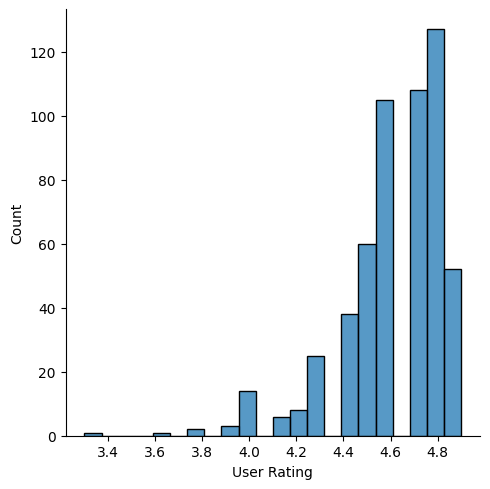

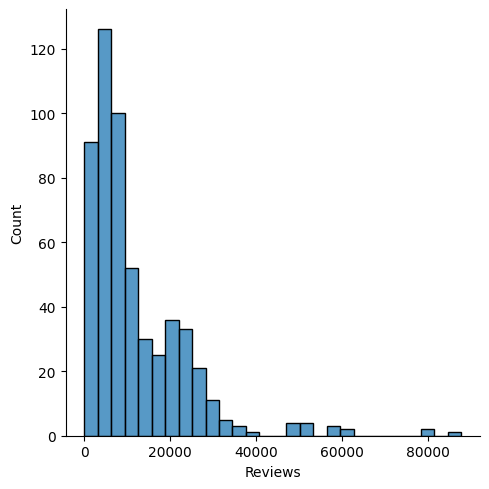

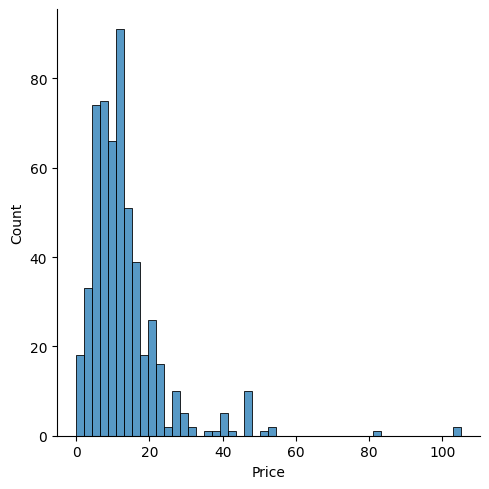

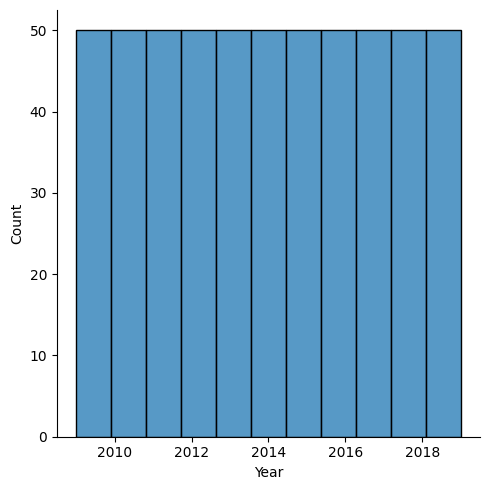

In [17]:
#displot to show distribution of the numerical variables
for column in num_variables:
    sns.displot(df[column])

Does the price of the books affect the user ratings? yes

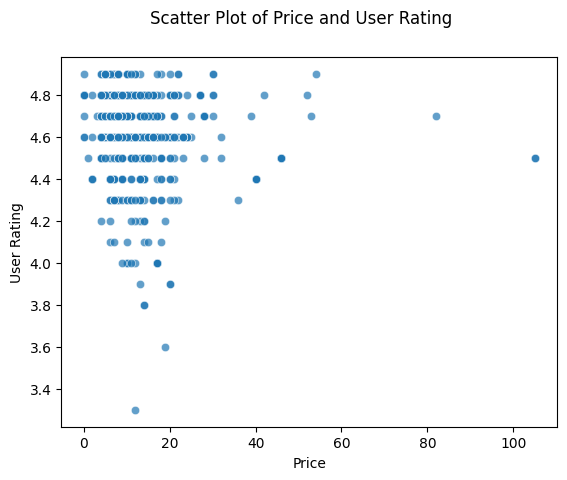

In [19]:
#scattered plots to show correlation/ relationship between the price  and User Rating
import matplotlib.pyplot as plt
sns.scatterplot(data=df, 
                x="Price", 
                y="User Rating",
                alpha = 0.7)
plt.suptitle("Scatter Plot of Price and User Rating")
plt.show()

Text(0.5, 28.999999999999986, 'Price')

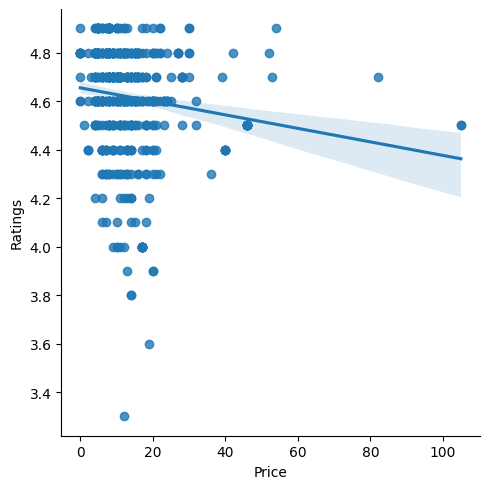

In [21]:
sns.lmplot(y='User Rating',x='Price',data=df)
plt.ylabel('Ratings')
plt.xlabel('Price')

Rating is affected by the price as it is evident that as price increases, ratings decreases

In [22]:

# To Calculate the correlation matrix
corr = df.corr()
corr

ValueError: could not convert string to float: '10-Day Green Smoothie Cleanse'

In [23]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_columns.corr()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

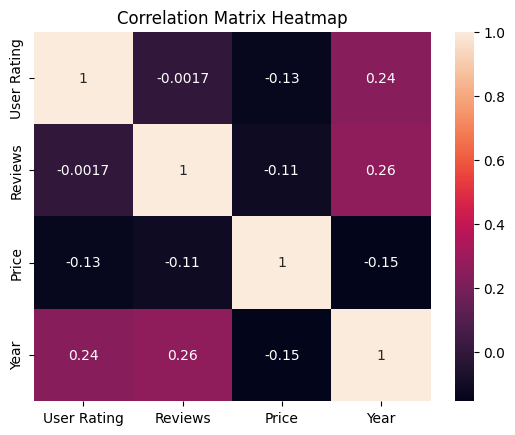

In [24]:
#Heatmap showing correlation in different variables.
# Create a heat map with correlation data
sns.heatmap(data= corr, annot=True)
plt.title("Correlation Matrix Heatmap")

what is the  category are the books in the genre.

In [26]:
# show the type of Genre in the dataframe.
genre_no=df.Genre.value_counts()
genre_no

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

This indicate that 310 are  non fiction while 240 are fiction.

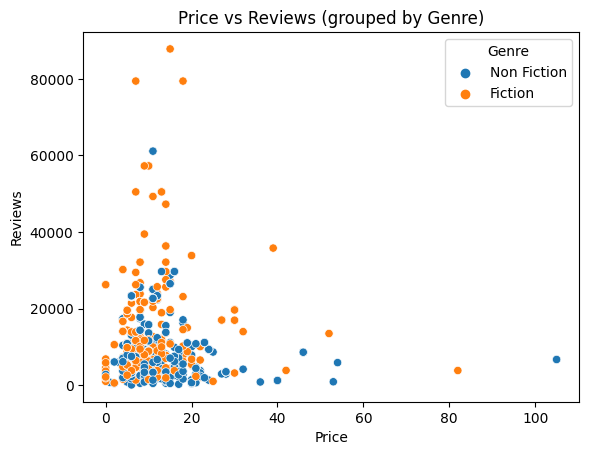

In [27]:
# Scatter plot of "Grocery" vs. "Milk" grouped by Frozen
sns.scatterplot(data=df, x='Price', y='Reviews', hue='Genre')
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.title('Price vs Reviews (grouped by Genre)')
plt.show()